## Bayes' rule

### Introduction

Consider the following figure, on the left side first. Imagine that we have two bags, $A$ and $B$. And I ask you. What is the probability of getting a 7?

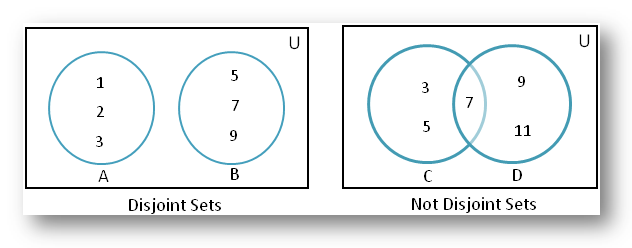

<center>Image source <a href="https://www.math-only-math.com/disjoint-of-sets-using-Venn-diagram.html"> Math-only.com </a></center>

$P(X=7) = \frac{1}{6}$

Now, if I told you that I took the number from $B$, would your expectation change? How do you add this new information?

$P(X=7|B) = \frac{1}{3}$


#### Conditional probability

Defined as:  

$P(X \cap B) =  P(X) \cdot P(B|X)  $ 

Conversely, we can say too:

$P(B \cap X) = P(B)\cdot P(X|B)   $ 

## Example 1

Repeat the computation using Bayes' rule. What if I say, what is the probability of $X=5$, if I know for sure I took it from $B$? 

### Solution

Using the definition, we can find 

$P(X=5 | B) = \frac{ P(X=5 \cap B)}{P(B)} = \frac{ P(X=5) \cdot P(B|X=5) }{P(B)} = \frac{ 1/6\cdot 1 }{3/6} = \frac{1}{3}$

----
### Bayes' rule

$P(H|D) = \frac{P(H) \cdot P(D|H)}{P(D)}$

Where 

* $P(H|D)$ is the posterior probability of $H$ given the data $D$, our main objective
* $P(H)$ is known as the prior. It summarizes all the beliefs of $H$ occurring before knowing the data $D$. 
* $P(D|H)$ is the likelihood. It is the probability of observing the data $D$ assuming that the hypothesis $H$ is true.
* $P(D)$ is the probability of the observed data occuring. It is also called the marginal probability of $D$.


## Example 2
-------------------

Imagine that you are being tested for a disease. 

$H$: Having the disease

$D$: testing positive 


-----
99.9% Of the ill people test popositive $P(D|H)$

1% Of the healthy people test positive $P(D|\bar H)$

Probability in the general population $2/10,000$


You test positive. What is your probability of having the disease? $P(H|D)$ Is it 99.9%? 


### Solution

Using Bayes' rule, we know that:

$P(H|D) = \frac{P(H) \cdot P(D|H)}{P(D)}$

The marginal probability can be written as:

$P(D) = P(D \cap H) + P(D \cap \bar H) = P(D|H)\cdot P(H) + P(D|\bar H)\cdot P(\bar H) = 0.999 \cdot \frac{2}{10,000} + 0.01 \cdot (1-\frac{2}{10,000})   = 0.001012$

So then the updated probability of having the disease after testing positive is:

$P(H|D) = \frac{P(H) \cdot P(D|H)}{P(D)} = \frac{\frac{2}{10,000} \cdot 0.999}{0.001012} = 19.74\%$


You get a second test. What is your prior?  What is the posterior?

The marginal probability is:

$P(D) = 0.999 \cdot 0.1974 + 0.01 \cdot (1-0.1974)   = 0.2052$

And substituting into Bayes's rule we get:

$P(H|D) = \frac{0.1974 \cdot 0.999}{0.2052} = 96.1\%$

With this result, your doctor says you have to start treatment right away.


## Some notes on the hypothesis

We can partition the probability space in an arbitrary number of hypothesis. To compute the marginal probability of the data $P(D)$ :

$P(D) = \sum_i P(H_i)\cdot P(D|H_i)$ 

$P(D) = \int_H P(H) \cdot P(D|H) dH$ 

In which we see that the marginal probability is just the sum of all the priors $P(H_i)$ times the likelihoods $P(D|H_i)$. We can use a Bayesian table to compute the posterior probability $P(H_i|D)$ for several hypothesis as follows:

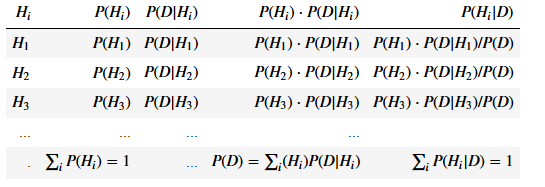

## Example 3
You are considering the efectiveness of a new drug. You collect a sample of 40 people and you divide them in two parts equally. One group is receiving the standard treatment, and the other group is receiving the new drug. 

You discover with the standard drug, 12 people were cured. With the new drug 18 people were cured.

Let $p$ be the proportion of cured people that came from the new drug group. If there is no difference between the two groups, $p$ should be 0.5.

From the chemical properties of the drug, you expect a similar action as the standard treatment, so you expect the result to be close of the range of 0.5. Therefore, you define the Beta with parameters $\alpha=5$ and $\beta=5$. The Beta distribution is:

$f(x,\alpha,\beta) = C \cdot x^{\alpha - 1} (1-x)^{\beta - 1}$ with $0<x<1$ and $\alpha, \beta >1$

The constant $C$ is just a normalization factor, which ensures that:

$\int_0^1 f(x,\alpha,\beta) dx = 1 $

The distribution of the priors, $B(5,5)$ is plotted below:

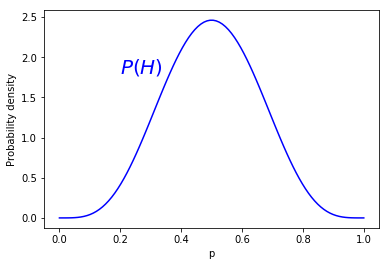

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt 
%matplotlib inline

x = np.linspace(0,1,100)
y = beta.pdf(x,5,5)

plt.xlabel('p')
plt.ylabel('Probability density')

plt.text(0.2,1.8, r'$P(H)$', fontsize=20, color='b')

plt.plot(x,y, color = 'b')
plt.show()

The likelihood is binomial, so the likelihood for N occurrences in a group of n is:

$P(x=N| p) =  \binom{n}{N} {p}^N (1-p)^{n-N}$

Now we need to compute the posterior, we can use Bayes' rule. The marginal probability is just a constant so the posterior can be written as:

$P(p|D) \propto P(p) \cdot P(D|p)$

Substiting our prior and likelihoods into Bayes' rule:

$P(p|D) \propto p^{\alpha - 1} (1-p)^{\beta - 1} \cdot p^N (1-p)^{n-N} $

Where we neglected the constant $C$ and the binomial term $\binom{n}{N}$, since they are constants. All of them are grouped into the proportional sign. Grouping the parameters we get:

$P(p|D) \propto p^{\alpha + N - 1} (1-p)^{\beta - 1 + n - N} $

__This distribution looks a lot like Beta distribution with different parameters!__ This is good news, in this case we can say that the posterior is distributed as:

$P(p|D) \sim Beta(\alpha + N, \beta + n - N)$

Substituting $n=30$ and $N=18$ we get:

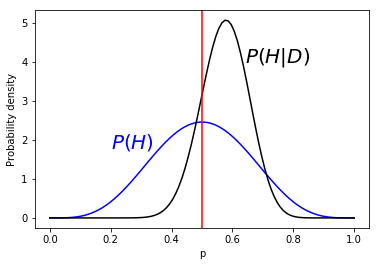

In [2]:
from scipy.stats import binom
x2 = np.linspace(0,1,100)
y2 = beta.pdf(x,5+18,5+12)
y3 = binom.pmf(18,30,x2)

plt.plot(x,y,color='b')
plt.plot(x2,y2,color='k')
#plt.plot(x2,y3*25, color ='r')

plt.text(0.2,1.8, r'$P(H)$', fontsize=20, color='b')
plt.text(0.64,4, r'$P(H|D)$', fontsize=20, color='k')
#plt.text(0.72,2, r'$P(D|H)$', fontsize=20, color='r')

plt.xlabel('p')
plt.ylabel('Probability density')

plt.axvline(x=0.5, color='r')

plt.show()

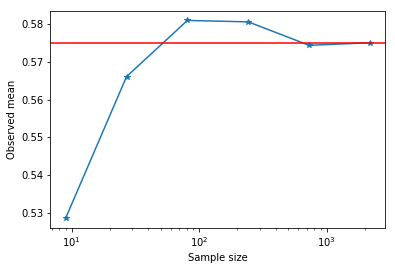

Estimated mean is  [0.396 0.575 0.529 0.566 0.581 0.581 0.574 0.575]


In [3]:
nval = 8#number of values
exp_n = np.arange(0,nval,1) #list of exponents
n = np.power(3,exp_n) # list of values

mval = []
mvar = []

for i in range(0,nval):
    values = np.random.beta(5+18,5+12,n[i]) 
    mval.append(np.mean(values))
    mvar.append(np.var(values))

np.mean(values)
plt.show()
np.mean(values)
plt.semilogx(n[2:],mval[2:],'-*') #omit small samples
plt.xlabel('Sample size')
plt.ylabel('Observed mean')
plt.axhline(0.575, color='r', linestyle='-')
plt.show()
print("Estimated mean is ", np.round(mval,3))

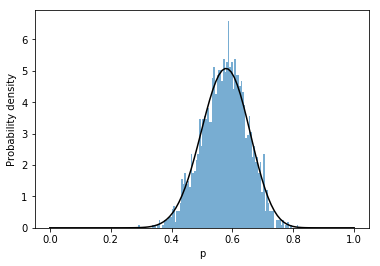

In [4]:
plt.plot(x2,y2,color='k')
n, bins, patches = plt.hist(values,100, alpha = 0.6, density=1)
plt.xlabel('p')
plt.ylabel('Probability density')
plt.show()

## Inference based on the posterior

Analytical mean Beta distribution is: $E[p] = \frac{\alpha}{\alpha + \beta} = \frac{5+18}{5+18+5+12} = 0.575$ 
Some people call this value the Bayesian estimate of $p$. 

Compare to the mean of the prior $E_{p}(X) = \frac{5}{10} = 0.5$

We can ask as well: what is the 95\% confidence interval? To compute the 95% confidence interval we'll use the cumulative distribution function of the posterior. See the code below:

In [5]:
left = np.round(beta.ppf(0.025,5+18,5+12),3)
right = np.round(beta.ppf(0.975, 5+18, 5+12),3)

print("The 95% confidence interval of p is: ", left, "< p <",right)

The 95% confidence interval of p is:  0.421 < p < 0.722


Moreover, we can compute the probability of p being higher than 0.5 as:

In [6]:
result = np.round(1-beta.cdf(0.5,5+18,5+12),3)

print("There is a ", result*100, "% probability that p > 0.5")

There is a  83.2 % probability that p > 0.5


## Conjugate priors

What we found in this example is the use of the __conjugate prior.__ When it is not possible to find the required integrals, numerical methods are possible, which are especially useful when several parameters are used. 

There are list of conjugate priors to likelihoods. The advantage of them are:
* Having an analytical solution to the posterior
* Easy to calculate

The disadvatange is:
* The conjugate might not be a good model for the prior

# Summary

* Bayesian inference is a different approach to do hypothesis testing
* We update our belief, the prior, with new data, using Bayes' rule
* For discrete distributions we can use the Bayesian box to compute the posterior
* For continuous distributions we can use conjugate priors for specific cases
* We can use numerical methods to compute complicated posteriors